# AST1420 Galactic Structure and Dynamics Problem Set 1
  
### Due on Oct. 15 at the start of class

### Bethany A Ludwig

Please re-run the entire notebook after re-starting the notebook kernel before uploading it.

#### Problem 1: The virial mass of the NFW profile. 

The virial mass of a dark matter halo is arguably its most fundamental parameter, because the tight correlation between correlation and mass found in numerical simulations of dark-matter halo formation means that dark-matter halos in nature form an essentially one-dimensional sequence of mass. 

However, the virial mass depends on how one chooses the overdensity $\Delta_v$ that defines the virial radius. A standard value for this is $\Delta_v = 200$, but as we will see when we discuss the formation of dark-matter halos in more detail, $\Delta_v$ should depend on the cosmological parameters and the redshift of the halo's formation.  

When doing this, $\Delta_v \approx 200$ at high redshift ($z \gtrsim 2$) in our Universe, but at the present day a value of $\Delta_v \approx 100$ is more correct. 

For a quantity as fundamental as the virial mass, many discussions of it in papers and elsewhere are
surprisingly vague on the overdensity used to define it! Let's see how much of an issue this is.


(a) Using the equations given for the NFW profile and using values appropriate for the Milky Way's dark-matter halo ($\rho_0 = 0.0035\,M_\odot\,\mathrm{pc}^{-3}$ and $a = 16\,\mathrm{kpc}$), compute the virial radius and virial mass as a function of $\Delta_v$ and plot them. 

Discuss how the virial radius and virial mass depend on $\Delta_v$. Use $H_0 = 70\,\mathrm{km\,s}^{-1}\,\mathrm{Mpc}^{-1}$.




In [1]:
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from galpy.orbit import Orbit
from galpy import potential

sns.set()

In [2]:
def rho_crit(H):
    # May need to worry about H != H_0
    return 3 * H ** 2 / (8 * np.pi * const.G)


# NFW density at Virial Radius
def func(
    c,
    Delta_v,
    rho_0=0.0035 * const.M_sun / u.pc ** 3,
    a=16 * u.kpc,
    H=70 * u.km / u.s / u.Mpc,
):
    return (3 * rho_0 / (c ** 3 * rho_crit(H))) * (
        np.log(1 + c) - c / (1 + c)
    ) - Delta_v


def r_virial(c, a=16 * u.kpc):
    return c * a


def numerical_solver(dv, tol=0.1):
    guess = 0.5
    h = 0.001
    maxSteps = 1000

    x = guess
    for i in range(maxSteps):
        val = abs(func(x, dv))
        if val <= tol:
            break
        x = x - func(x, dv) * h / (func(x + h, dv) - func(x, dv))

    result = x.value

    err = func(x, dv).value

    return result, err


def m_virial(c, Delta_v, a=16 * u.kpc, H=70 * u.km / u.s / u.Mpc):

    return ((4 * np.pi / 3) * (a * c) ** 3 * Delta_v * rho_crit(H)).to(u.M_sun)

In [3]:
# Set range of values for the overdensity
dv = np.arange(1, 300)
# Numerically solve for each value and return c and error in solving.
solve_c = np.array([numerical_solver(n) for n in dv])
# Split results into separate arrays
c = solve_c[:, 0]
c_err = solve_c[:, 1]
# Calculate virial mass at each concentration and overdensity.
m = m_virial(c, dv)

''

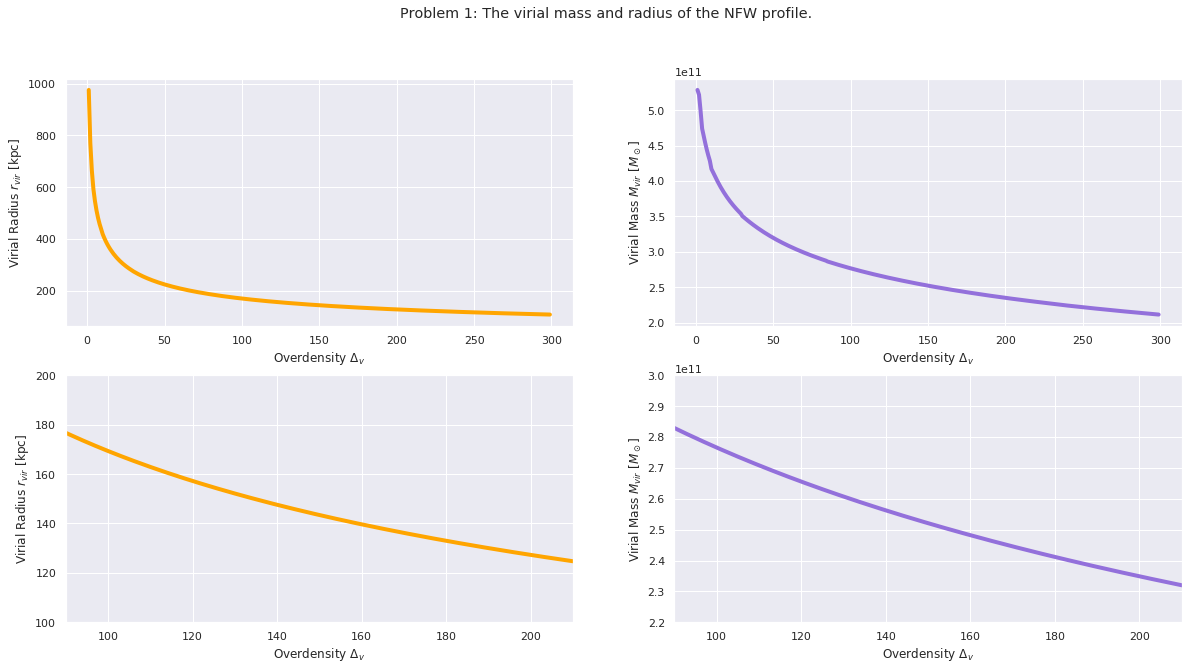

In [4]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
axes[0, 0].plot(dv, r_virial(c), color="orange", linewidth=4)
axes[0, 0].set_xlabel(r"Overdensity $\Delta_v$")
axes[0, 0].set_ylabel(r"Virial Radius $r_{vir}$ [kpc]")

axes[0, 1].plot(dv, m, color="mediumpurple", linewidth=4)
axes[0, 1].set_xlabel(r"Overdensity $\Delta_v$")
axes[0, 1].set_ylabel(r"Virial Mass $M_{vir}$ [$M_\odot$]")

# Zoom in on appropriate values for overdensity (i.e: 100 - 200)
axes[1, 0].plot(dv, r_virial(c), color="orange", linewidth=4)
axes[1, 0].set_xlabel(r"Overdensity $\Delta_v$")
axes[1, 0].set_ylabel(r"Virial Radius $r_{vir}$ [kpc]")
axes[1, 0].set_xlim(90, 210)
axes[1, 0].set_ylim(100, 200)

axes[1, 1].plot(dv, m, color="mediumpurple", linewidth=4)
axes[1, 1].set_xlabel(r"Overdensity $\Delta_v$")
axes[1, 1].set_ylabel(r"Virial Mass $M_{vir}$ [$M_\odot$]")
axes[1, 1].set_xlim(90, 210)
axes[1, 1].set_ylim(2.2e11, 3e11)

plt.suptitle("Problem 1: The virial mass and radius of the NFW profile.")
;

### Discuss how the virial radius and virial mass depend on $\Delta_v$.

The figure above shows how both the NFW virial radius and virial mass change with the overdensity constant $\Delta_v$. The first row shows a generous range of overdensity values from 0 to 300 while the second row shows a "zoomed in" version focusing on the overdensity values for which appropriate redshifts are given.   

As the universe evolved, both the virial mass and radius of dark matter halos increased while the overdensity decreased. In the regime of expected values for overdensities, the relationship appears to be linear.   
This matches with the expected values of each parameter since $\Delta_v = 100$ corresponds with a redshift of 0  and $\Delta_v = 200$ with a redshift of 2

In [5]:
r_err = np.abs((r_virial(c[dv == 200]) - r_virial(c[dv == 100])) / r_virial(c[dv == 200])) * 100
m_err = np.abs((m_virial(c[dv == 200],dv[dv == 200]) - m_virial(c[dv == 100],dv[dv == 100])) / m_virial(c[dv == 200],dv[dv == 200])) * 100

print(f"Percent difference in choosing wrong value for the overdensity when evaluating the virial radius: {r_err.value[0]:.4}% and virial mass: {m_err.value[0]:.4}%")

Percent difference in choosing wrong value for the overdensity when evaluating the virial radius: 33.04% and virial mass: 17.75%


### (b) What about the NFW density profile causes the behavior that you see?

In the top row of the above figure both the virial radius and mass asymptote to infinity as the overdensity approaches 0. This can also be seen analytically in the NFW density profile as 

$\bar{\rho}(r=0) = \frac{3\rho_o a^3}{0} (\ln(1+0) - \frac{0}{1+0}) \approx \infty $

Therefore the NFW density profile blows up as the overdensity approaches 0.

Another thing we can do with the density profile, is let the scale radius $a=1$ and taylor expand the two terms in f(r): 

$\bar{\rho} = \frac{3\rho_o}{r^3} \big(ln(1+r) - r(\frac{1}{1+r} \big)$

$\bar{\rho} = \frac{3\rho_o}{r^3} \big(r - \frac{1}{2}r^2 - r(\frac{1}{1+r}) \big)$

$\bar{\rho} = \frac{3\rho_o}{r^3} \big(r - \frac{1}{2}r^2 - r(1-r) \big)$

$\bar{\rho} = \frac{3\rho_o}{r^3} \big(r - \frac{1}{2}r^2 - r + r^2) \big)$

$\bar{\rho} = \frac{3\rho_o}{r^3} \frac{1}{2}r^2$

$\bar{\rho} = \frac{3\rho_o}{2 r}$

Thus the density profile has a functional form of 1 / r which matches the form of the plot above. 

''

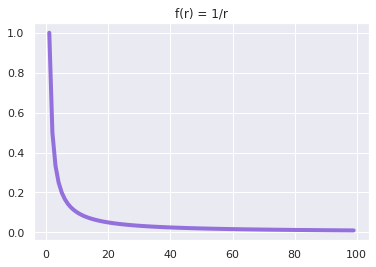

In [6]:
plt.plot(np.arange(1, 100), 1 / np.arange(1, 100), lw = 4, c = "mediumpurple")
plt.title("f(r) = 1/r")
;

#### Problem 2: 

In his colloquium a few weeks ago, Scott Tremaine discussed scattering of comets by the planets in the solar system as the comets pass through the inner solar system. He mentioned that scattering of the comets tends to preserve their pericentric distances. Let's understand why that is using what we know about orbits in spherical potentials!

(a) Consider an orbit in a spherical isochrone potential with $b=1$ (pick an orbit that explores $r \approx 1$ and is not too close to circular). 

Using orbit integration in galpy, add an instantaneous velocity offset when the orbit is at its pericenter radius. 

Investigate what happens to the pericenter radius of the resulting orbit. 

Is it larger or smaller than the original pericenter radius? 

It is useful to consider the special cases where (i) you only change the radial velocity and (ii) you only change the tangential velocity (or equivalently the angular momentum). 

Does the answer change if you consider different orbits?

#### Parameters

In [7]:
# Parameters
R = 1.01
radial_v = 0.1
tan_v = 1
kick_radial = 0.05
kick_tan = 0.1
t_multiplier = 1
dim = [-1.5, 1.5]

#### Changing only the radial velocity

/home/bethany/anaconda3/lib/python3.7/site-packages/galpy/actionAngle/actionAngleSpherical.py:446: RuntimeWarning: invalid value encountered in true_divide
  sinu= z/R/numpy.tan(i)

/home/bethany/anaconda3/lib/python3.7/site-packages/galpy/actionAngle/actionAngleSpherical.py:494: RuntimeWarning: invalid value encountered in double_scalars
  sinpsi= z/r/numpy.sin(i)



''

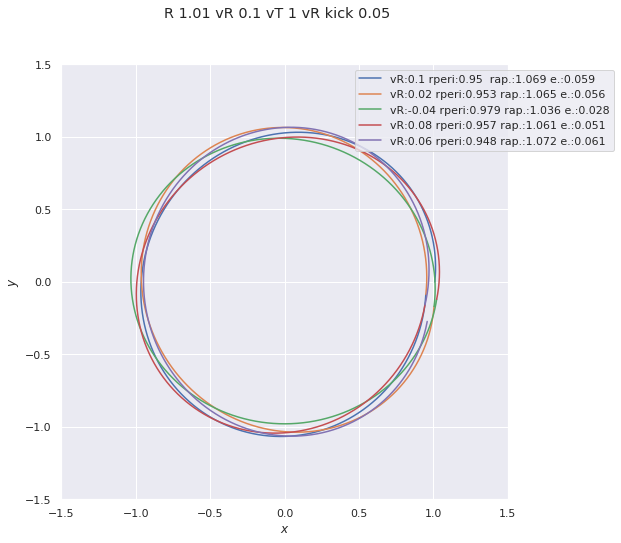

In [8]:
# Initiate Potential
ip = potential.IsochronePotential(amp = 1.0, b = 1.0, normalize = 1)

# Initiate Orbit
orbit = Orbit([R, radial_v, tan_v, 0])

Tp = orbit.Tp(ip)

time_steps = np.arange(0, t_multiplier * Tp, 0.001)

orbit.integrate(time_steps, ip)

orbit.plot(
    xrange = dim,
    yrange = dim,
    label = f"vR:{orbit.vR():.1f} rperi:{orbit.rperi():.2f}  rap.:{orbit.rap():.3f} e.:{orbit.e():.3f}",
)

# Plot a few more orbits where vT is increased by some amount at Perihelion
for i in range(4):

    inter_orbit = orbit(time_steps[-1])

    inter_orbit.vxvv[0][1] += kick_radial

    orbit = Orbit(inter_orbit.vxvv)

    # Tp is time from perihelion to aphelion and back.

    Tp = orbit.Tp(ip)

    time_steps = np.arange(0, t_multiplier * Tp, 0.001)

    orbit.integrate(time_steps, ip)

    orbit.plot(
        xrange = dim,
        yrange = dim,
        overplot = True,
        label = f"vR:{orbit.vR()[0]:.2f} rperi:{orbit.rperi()[0]:.3f} rap.:{orbit.rap()[0]:.3f} e.:{orbit.e()[0]:.3f}",
    )

plt.legend(loc = "upper right", bbox_to_anchor = (1.25, 1.0))
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.suptitle(f"R {R} vR {radial_v} vT {tan_v} vR kick {kick_radial}")
;

Even with a kick of half the initial radial velocity the oscillations in the pericentric distances are quite small, with the largest percent difference being around 3%. The radial velocity at pericenter however oscillates quite a bit even with the kick. 

#### Changing only the tangential velocity

''

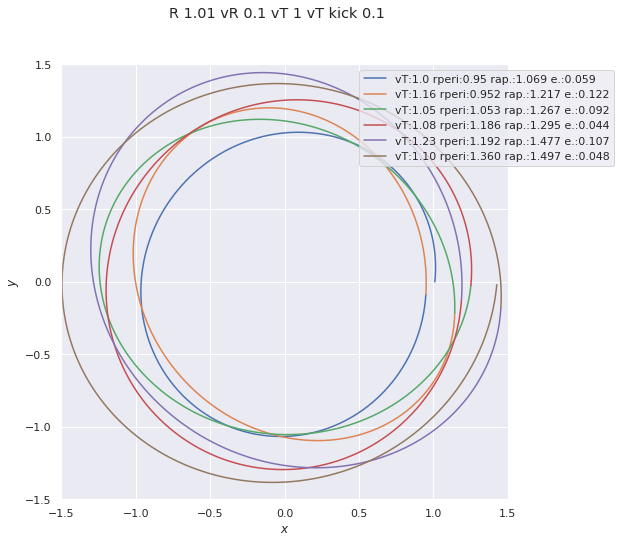

In [9]:
# Initiate Potential
ip = potential.IsochronePotential(amp = 1.0, b = 1.0, normalize = 1)

# Initiate Orbit
orbit = Orbit([R, radial_v, tan_v, 0])

Tp = orbit.Tp(ip)

time_steps = np.arange(0, t_multiplier * Tp, 0.001)

orbit.integrate(time_steps, ip)

orbit.plot(
    xrange = dim,
    yrange = dim,
    label = f"vT:{orbit.vT():.1f} rperi:{orbit.rperi():.2f} rap.:{orbit.rap():.3f} e.:{orbit.e():.3f}",
)


# Plot a few more orbits where vT is increased by some amount at Perihelion
for i in range(5):

    inter_orbit = orbit(time_steps[-1])

    inter_orbit.vxvv[0][2] += kick_tan

    orbit = Orbit(inter_orbit.vxvv)

    Tp = orbit.Tp(ip)

    time_steps = np.arange(0, t_multiplier * Tp, 0.001)

    orbit.integrate(time_steps, ip)

    orbit.plot(
        xrange = dim,
        yrange = dim,
        overplot = True,
        label = f"vT:{orbit.vT()[0]:.2f} rperi:{orbit.rperi()[0]:.3f} rap.:{orbit.rap()[0]:.3f} e.:{orbit.e()[0]:.3f}",
    )

plt.legend(loc = "upper right", bbox_to_anchor = (1.25, 1.0))
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.suptitle(f"R {R} vR {radial_v} vT {tan_v} vT kick {kick_tan}")
;

Likewise changing the tangential velocity doesn't change the pericentric distance by much, but it is a more noticeable sinusoidal oscillation. 

#### Changing the orbits (1) : Increasing the radius

In [10]:
# Parameters
R = 1.2
radial_v = 0.1
tan_v = 1
kick_radial = 0.05
kick_tan = 0.1
t_multiplier = 1
dim = [-1.5, 1.5]

''

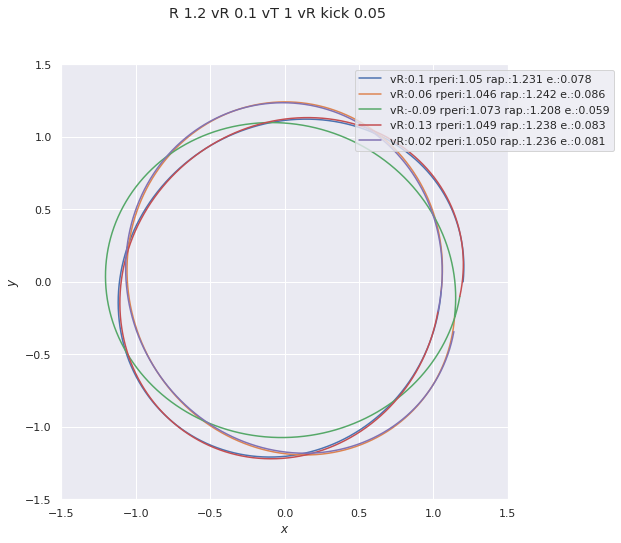

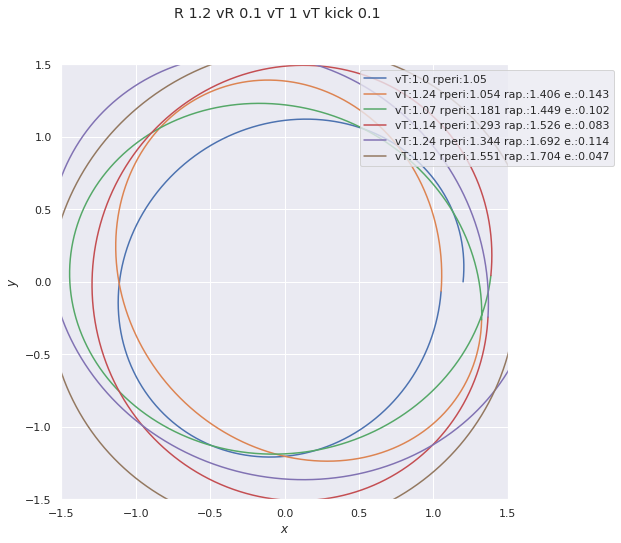

In [11]:
#####

# Initiate Potential
ip = potential.IsochronePotential(amp = 1.0, b = 1.0, normalize = 1)

# Initiate Orbit
orbit = Orbit([R, radial_v, tan_v, 0])

Tp = orbit.Tp(ip)

time_steps = np.arange(0, t_multiplier * Tp, 0.001)

orbit.integrate(time_steps, ip)

orbit.plot(
    xrange = dim,
    yrange = dim,
    label = f"vR:{orbit.vR():.1f} rperi:{orbit.rperi():.2f} rap.:{orbit.rap():.3f} e.:{orbit.e():.3f}",
)

# Plot a few more orbits where vT is increased by some amount at Perihelion
for i in range(4):

    inter_orbit = orbit(time_steps[-1])

    inter_orbit.vxvv[0][1] += kick_radial

    orbit = Orbit(inter_orbit.vxvv)

    # Tp is time from perihelion to aphelion and back.

    Tp = orbit.Tp(ip)

    time_steps = np.arange(0, t_multiplier * Tp, 0.001)

    orbit.integrate(time_steps, ip)

    orbit.plot(
        xrange = dim,
        yrange = dim,
        overplot = True,
        label = f"vR:{orbit.vR()[0]:.2f} rperi:{orbit.rperi()[0]:.3f} rap.:{orbit.rap()[0]:.3f} e.:{orbit.e()[0]:.3f}",
    )

plt.legend(loc = "upper right", bbox_to_anchor = (1.25, 1.0))
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.suptitle(f"R {R} vR {radial_v} vT {tan_v} vR kick {kick_radial}")

# Initiate Potential
ip = potential.IsochronePotential(amp = 1.0, b = 1.0, normalize = 1)

# Initiate Orbit
orbit = Orbit([R, radial_v, tan_v, 0])

Tp = orbit.Tp(ip)

time_steps = np.arange(0, t_multiplier * Tp, 0.001)

orbit.integrate(time_steps, ip)

orbit.plot(
    xrange = dim, yrange = dim, label = f"vT:{orbit.vT():.1f} rperi:{orbit.rperi():.2f}"
)


# Plot a few more orbits where vT is increased by some amount at Perihelion
for i in range(5):

    inter_orbit = orbit(time_steps[-1])

    inter_orbit.vxvv[0][2] += kick_tan

    new_vT = inter_orbit.vxvv[0][2]

    orbit = Orbit(inter_orbit.vxvv)

    Tp = orbit.Tp(ip)

    time_steps = np.arange(0, t_multiplier * Tp, 0.001)

    orbit.integrate(time_steps, ip)

    orbit.plot(
        xrange=dim,
        yrange=dim,
        overplot=True,
        label=f"vT:{new_vT:.2f} rperi:{orbit.rperi()[0]:.3f} rap.:{orbit.rap()[0]:.3f} e.:{orbit.e()[0]:.3f}",
    )

plt.legend(loc = "upper right", bbox_to_anchor = (1.25, 1.0))
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.suptitle(f"R {R} vR {radial_v} vT {tan_v} vT kick {kick_tan}")
;

#### Changing the orbits (2): increasing the radial velocity

In [12]:
# Parameters
R = 1.01
radial_v = 1
tan_v = 1
kick_radial = 0.05
kick_tan = 0.1
t_multiplier = 1
dim = [-1.5, 1.5]

''

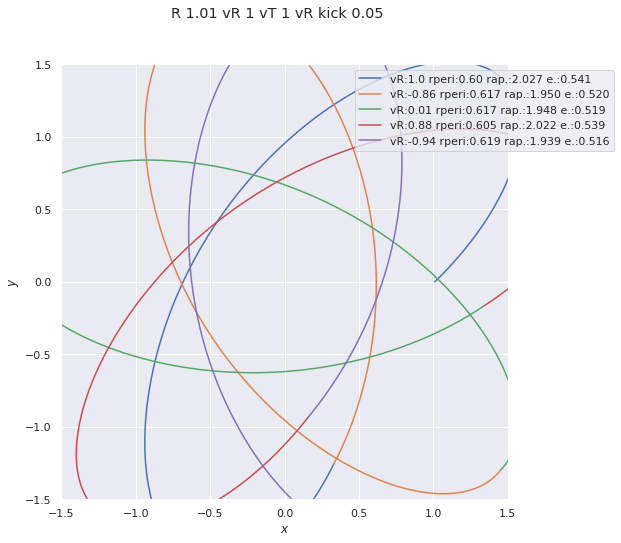

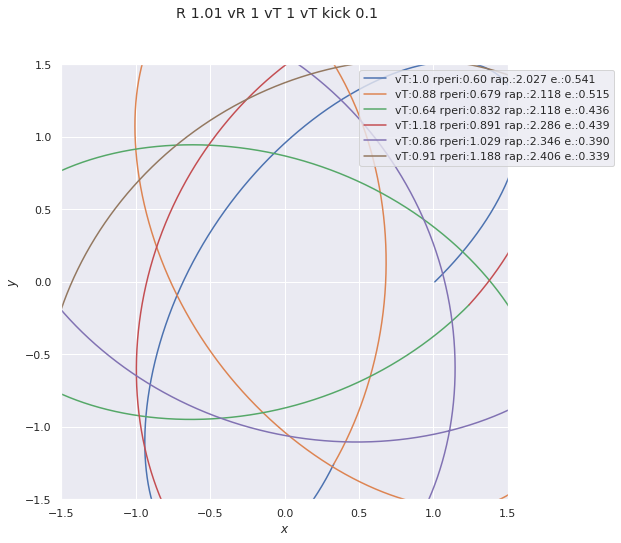

In [13]:
#####

# Initiate Potential
ip = potential.IsochronePotential(amp = 1., b = 1., normalize = 1)

# Initiate Orbit
orbit = Orbit([R, radial_v, tan_v, 0])

Tp = orbit.Tp(ip)

time_steps = np.arange(0, t_multiplier * Tp, 0.001)

orbit.integrate(time_steps, ip)

orbit.plot(xrange = dim, yrange = dim,
           label = f"vR:{orbit.vR():.1f} rperi:{orbit.rperi():.2f} rap.:{orbit.rap():.3f} e.:{orbit.e():.3f}")

# Plot a few more orbits where vT is increased by some amount at Perihelion
for i in range(4):

    inter_orbit = orbit(time_steps[-1])

    inter_orbit.vxvv[0][1] += kick_radial

    orbit = Orbit(inter_orbit.vxvv)

    # Tp is time from perihelion to aphelion and back.

    Tp = orbit.Tp(ip)

    time_steps = np.arange(0, t_multiplier * Tp, 0.001)

    orbit.integrate(time_steps, ip)

    orbit.plot(xrange = dim, yrange = dim, overplot = True,
               label = f"vR:{orbit.vR()[0]:.2f} rperi:{orbit.rperi()[0]:.3f} rap.:{orbit.rap()[0]:.3f} e.:{orbit.e()[0]:.3f}")

plt.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.0))
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.suptitle(f"R {R} vR {radial_v} vT {tan_v} vR kick {kick_radial}")

# Initiate Potential
ip = potential.IsochronePotential(amp = 1., b = 1., normalize = 1)

# Initiate Orbit
orbit = Orbit([R, radial_v, tan_v, 0])

Tp = orbit.Tp(ip)

time_steps = np.arange(0, t_multiplier * Tp, 0.001)

orbit.integrate(time_steps, ip)

orbit.plot(xrange = dim, yrange = dim,
           label = f"vT:{orbit.vT():.1f} rperi:{orbit.rperi():.2f} rap.:{orbit.rap():.3f} e.:{orbit.e():.3f}")

# print(orbit.vxvv)

# Plot a few more orbits where vT is increased by some amount at Perihelion
for i in range(5):

    inter_orbit = orbit(time_steps[-1])

    inter_orbit.vxvv[0][2] += kick_tan

    new_vT = inter_orbit.vxvv[0][2]

    orbit = Orbit(inter_orbit.vxvv)

    Tp = orbit.Tp(ip)

    time_steps = np.arange(0, t_multiplier * Tp, 0.001)

    orbit.integrate(time_steps, ip)

    orbit.plot(xrange = dim, yrange = dim, overplot = True,
               label = f"vT:{new_vT:.2f} rperi:{orbit.rperi()[0]:.3f} rap.:{orbit.rap()[0]:.3f} e.:{orbit.e()[0]:.3f}")

plt.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.0))
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.suptitle(f"R {R} vR {radial_v} vT {tan_v} vT kick {kick_tan}")
;

#### Changing the orbits (3) : Changing the potential

In [14]:
# Parameters
R = 1.01
radial_v = 0.1
tan_v = 0.1
kick_radial = 0.05
kick_tan = 0.1
t_multiplier = 1
dim = [-1.5, 1.5]

In [15]:
from galpy.potential import MWPotential2014

hp = MWPotential2014[2]
hp.normalize(1.0)

''

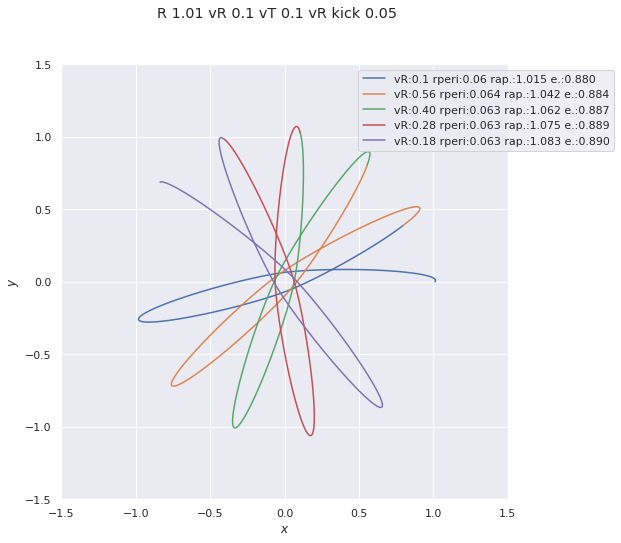

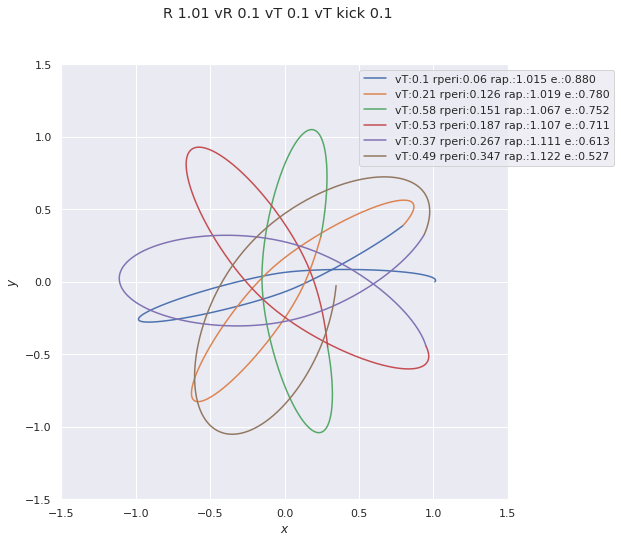

In [16]:
# Initiate Orbit
orbit = Orbit([R, radial_v, tan_v, 0])

Tp = orbit.Tp(hp)

time_steps = np.arange(0, t_multiplier * Tp, 0.001)

orbit.integrate(time_steps, hp)

orbit.plot(
    xrange = dim,
    yrange = dim,
    label = f"vR:{orbit.vR():.1f} rperi:{orbit.rperi():.2f} rap.:{orbit.rap():.3f} e.:{orbit.e():.3f}",
)

# Plot a few more orbits where vT is increased by some amount at Perihelion
for i in range(4):

    inter_orbit = orbit(time_steps[-1])

    inter_orbit.vxvv[0][1] += kick_radial

    orbit = Orbit(inter_orbit.vxvv)

    # Tp is time from perihelion to aphelion and back.

    Tp = orbit.Tp(ip)

    time_steps = np.arange(0, t_multiplier * Tp, 0.001)

    orbit.integrate(time_steps, hp)

    orbit.plot(
        xrange = dim,
        yrange = dim,
        overplot = True,
        label = f"vR:{orbit.vR()[0]:.2f} rperi:{orbit.rperi()[0]:.3f} rap.:{orbit.rap()[0]:.3f} e.:{orbit.e()[0]:.3f}",
    )

plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.0))
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.suptitle(f"R {R} vR {radial_v} vT {tan_v} vR kick {kick_radial}")


# Initiate Orbit
orbit = Orbit([R, radial_v, tan_v, 0])

Tp = orbit.Tp(hp)

time_steps = np.arange(0, t_multiplier * Tp, 0.001)

orbit.integrate(time_steps, hp)

orbit.plot(
    xrange = dim,
    yrange = dim,
    label = f"vT:{orbit.vT():.1f} rperi:{orbit.rperi():.2f} rap.:{orbit.rap():.3f} e.:{orbit.e():.3f}",
)

# print(orbit.vxvv)

# Plot a few more orbits where vT is increased by some amount at Perihelion
for i in range(5):

    inter_orbit = orbit(time_steps[-1])

    inter_orbit.vxvv[0][2] += kick_tan

    new_vT = inter_orbit.vxvv[0][2]

    orbit = Orbit(inter_orbit.vxvv)

    Tp = orbit.Tp(hp)

    time_steps = np.arange(0, t_multiplier * Tp, 0.001)

    orbit.integrate(time_steps, hp)

    orbit.plot(
        xrange = dim,
        yrange = dim,
        overplot = True,
        label = f"vT:{new_vT:.2f} rperi:{orbit.rperi()[0]:.3f} rap.:{orbit.rap()[0]:.3f} e.:{orbit.e()[0]:.3f}",
    )

plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.0))
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.suptitle(f"R {R} vR {radial_v} vT {tan_v} vT kick {kick_tan}")
;

The same trend appears when considering different orbits. Introducing kicks to the radial velocity does not significantly change the pericentric distance but kicks to the tangential velocity does introduce some small oscillations. 

#### (b) Argue why the behavior you saw in part (a) is true for any orbit in any spherical potential. (Hint: consider the special cases and what happens to the effective potential). You can illustrate your argument with the orbit(s) that you investigated in (a), but make it clear why the behavior is general.

#### (c) What happens to the apocenter radius and the eccentricity in (a)? Investigate numerically and explain what is happening.

I added the apocenter radius and the eccentrity to the legend in each case to keep track of what was happening. These also seem relatively stable depending on the orbit. Eccentricity seems to vary more than apocenter radius. 

#### (d) Now consider the orbit of a comet that originates from the Oort cloud, at 20,000 AU and has an orbit that brings it to 2 AU. The perturbations to the orbit near its pericenter from the planets lead to changes in the energy that are equivalent to changing the inverse semi-major axis by $10^{-4}\,\mathrm{AU}^{-1}$. By considering a few different ways of distributing this energy change into radial and tangential velocity kicks, determine how the pericenter and apocenter distances of this comet change. Do you see what Scott claimed? Discuss.

### Problem 3: The cored isothermal sphere and self-interacting dark matter models.

(a) Equation (6.81) for the density of an isothermal sphere: 

\begin{equation}
\frac{d}{dr}\big(r^2\frac{d\ln\rho}{dr}\big) = - \frac{4\pi G}{\sigma^2} r^2 \rho 
\end{equation}

has non-singular solutions that can be found by specifying the boundary condition for a core: 

$\rho(0) = \rho_0$ and $\mathrm{d} \rho / \mathrm{d} r = 0$ at $r=0$. 

Demonstrate by writing Equation (6.81) in terms of 

$y=\ln\frac{ \tilde{\rho}}{\rho_0}$ and $x = \frac{r}{r_0}$ where $r_0^2 = \frac{9\sigma^2}{4\pi G\rho_0}$ 

that cored solutions have the form $\rho(r) = \rho_0\,f(\frac{r}{r_0})$ and give the equation that determines $f(x)$.

-----------------------------------------

To do the transformation, $r = x r_0$ and $y = \ln \rho - \ln \rho_0$ so  $\ln \rho = y + \ln \rho_0$

\begin{equation}
\frac{d}{d(x r_0)}\big((x r_0)^2\frac{d(y + \ln \rho_0)}{d(x r_0)}\big) = - \frac{4\pi G}{\sigma^2} \frac{9\sigma^2}{4\pi G\rho_0} x^2 \rho 
\end{equation}

\begin{equation}
\frac{1}{r_0}\frac{d}{dx}\big((x r_0)^2\frac{d(y + \ln \rho_0)}{d(x r_0)}\big) = - \frac{4\pi G}{\sigma^2} \frac{9\sigma^2}{4\pi G\rho_0} x^2 \rho 
\end{equation}

\begin{equation}
\frac{d}{dx}\big(x^2\frac{d}{dx}(y + \ln \rho_0)\big) = -  \frac{9\rho}{\rho_0} x^2  
\end{equation}

\begin{equation}
\frac{d}{dx}\big(x^2\frac{dy}{dx}\big) = -  \frac{9\rho}{\rho_0} x^2  
\end{equation}

\begin{equation}
2x \frac{dy}{dx} + x^2 \frac{d^2y}{dx^2} = -  \frac{9\rho}{\rho_0} x^2  
\end{equation}

If we assume that a solution will come in the form of $y=\ln x$ then $y=\ln\frac{ \tilde{\rho}}{\rho_0}$, $e^y=\frac{ \tilde{\rho}}{\rho_0}$. I don't know what the tilde means, so I'll ignore it for now. 

\begin{equation}
2x \frac{dy}{dx} + x^2 \frac{d^2y}{dx^2} = -  9 e^y x^2  
\end{equation}

\begin{equation}
\frac{d^2y}{dx^2} + \frac{2}{x} \frac{dy}{dx}  = -  9 e^y  
\end{equation}

We plug in $y=\ln\big(f(x)\big)$ 

\begin{equation}
\frac{d^2}{dx^2}(\ln\big(f(x)\big)) + \frac{2}{x} \frac{d}{dx}(\ln\big(f(x)\big))  = -  9 e^{\ln\big(f(x)\big)} 
\end{equation}

\begin{equation}
\frac{f''(x)}{f(x)} - \frac{f'(x)^2}{f(x)^2} + \frac{2}{x} \frac{f'(x)}{f(x)}  = -  9 f(x)
\end{equation}

The equation that determines $f(x)$ is then: 
\begin{equation}
f''(x)f(x) - f'(x)^2 + \frac{2}{x} f'(x)f(x) =-9f(x)^3 ; f(0) = 1 ;  f'(0) = 0
\end{equation}

(b) Write a function that computes $f(x)$ and use it to plot $\rho/\rho_0$ as a function of $r/r_0$ for the cored isothermal sphere. Compare what you see to the singular isothermal sphere.



In [17]:
h = 0.01
end = 10000

num_points = int(end / h + 1)

arr = np.zeros(num_points)


def f(n):

    if n == 0 or n == 1:

        arr[n] = 1

    elif n == 2:

        arr[n] = (
            2 * arr[n - 1]
            - arr[n - 2]
            - 9 * h ** 2 * arr[n - 2] ** 2
            + (1 / arr[n - 2]) * (arr[n - 1] - arr[n - 2]) ** 2
        )

    else:

        arr[n] = (
            2 * arr[n - 1]
            - arr[n - 2]
            - 9 * h ** 2 * arr[n - 2] ** 2
            + (1 / arr[n - 2]) * (arr[n - 1] - arr[n - 2]) ** 2
            - (2 / (n - 2)) * (arr[n - 1] - arr[n - 2])
        )


for i in range(num_points):

    f(i)


def iso(x):

    return (2 / 9) * x ** (-2)

/home/bethany/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in power



''

/home/bethany/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)



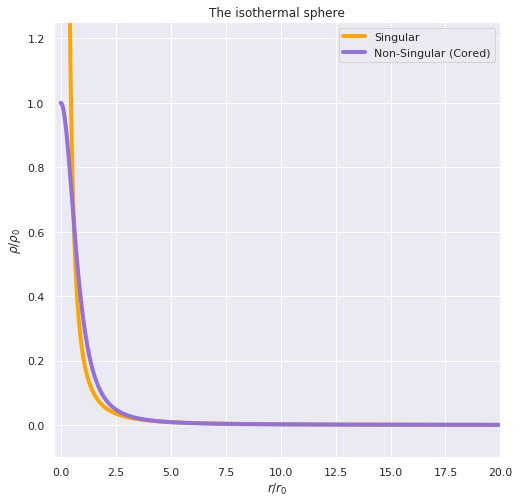

In [18]:
r = np.arange(0, end + h, h)

plt.figure(figsize = (8, 8))
plt.plot(r, iso(r), label = "Singular", lw = 4, c = "orange")
plt.plot(r, arr, label = "Non-Singular (Cored)", lw = 4, c = "mediumpurple")
plt.ylim(-0.1, 1.25)
plt.xlim(-0.3,20)
plt.ylabel(r"$\rho / \rho_0$")
plt.xlabel(r"$r/r_0$")
plt.legend()
plt.title("The isothermal sphere")
;

The singular isothermal sphere and the cored isothermal sphere we computed have similar forms but the singular function approaches infinity as r goes to 0 where the cored sphere does not by definition since we impose boundary conditions. Both singular and non singular forms are equivalent at large r. 

(c) An often preferred model for the dark matter density profile is the NFW profile. Using an NFW profile with concentration 11.5 and a virial mass of $7\times 10^{11}\,M_\odot$ (for $\Delta_v = 200$; this is like the Milky Way's dark matter halo), numerically compute the radial velocity dispersion profile in $\mathrm{km\,s}^{-1}$ for $\beta = 0$ and $\beta = 0.5$ (implement the integrals yourself, don't just use galpy.df.jeans). Plot your solution on a logarithmic grid from $r = 1\,\mathrm{kpc}$ to $r=300\,\mathrm{kpc}$.



In [19]:
def rho_crit(H = 70 * u.km / u.s / u.Mpc):
    return 3 * H ** 2 / (8 * np.pi * const.G)

def r_vir(Mvir = 7e11 * u.M_sun, delta_v = 200):
    return (((3 * Mvir) / (4 * np.pi) * (1 / (delta_v * rho_crit()))) ** (1 / 3)).to(u.kpc)

def f(c):
    return np.log(1 + c) - (c / (1 + c))

def rho_0(c = 11.5, delta_v = 200):
    return ((delta_v * rho_crit()) / 3 * (c ** 3 / f(c))).to(u.g / u.cm ** 3)

def a(c=11.5):
    return r_vir() / c

def rho(r, c = 11.5, alpha = 1, beta = 3):
    return rho_0() * a() ** alpha / (r ** alpha * (1 + r / a()) ** (beta - alpha))

def dphi_dr(r):
    return (4 * np.pi * const.G * rho_0() * a() ** 3 / r) * (
        (1 / r) * np.log(1 + r / a()) - 1 / (r + a()))

def b_0_integrand(r):
    return rho(r) * dphi_dr(r)

def b_1_2_integrand(r):
    return r * rho(r) * dphi_dr(r)

''

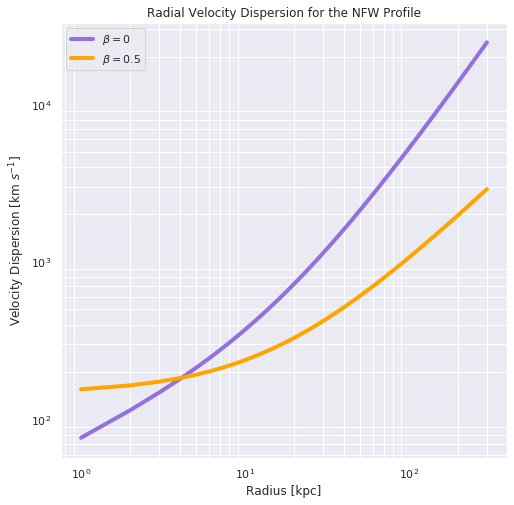

In [20]:
r = np.arange(1, 300) * u.kpc

v_dis_0 = np.sqrt(np.trapz(b_0_integrand(r), r) / rho(r)).to(u.km / u.s)

v_dis_1_2 = np.sqrt(np.trapz(b_1_2_integrand(r), r) / (r * rho(r))).to(u.km / u.s)

plt.figure(figsize = (8, 8))
plt.loglog(r, v_dis_0, lw = 4, c = "mediumpurple", label = r"$\beta =0$")
plt.loglog(r, v_dis_1_2, lw = 4, c = "orange", label = r"$\beta =0.5$")
plt.grid(which = "both")
plt.xlabel("Radius [kpc]")
plt.ylabel("Velocity Dispersion [km $s^{-1}$]")
plt.legend()
plt.title("Radial Velocity Dispersion for the NFW Profile")
;

(d) The cored isothermal sphere describes the inner regions of dark matter halos in models where dark matter particles interact strongly enough that they scatter off of each other and thermalize in regions of high enough dark-matter density (through interactions that are analogous to non-gravitational interactions between baryons). This thermalization homogenizes the velocity dispersion and this means that in these models, the outer dark matter profile is given by the standard NFW form, while the inner profile is that of the cored isothermal sphere. The boundary between these two regimes is at the radius where a dark matter particle is expected to scatter once. The scattering rate per unit time per particle is given by

\begin{equation}
  \Gamma(r) = {\sigma \over m}\,{4 \over \sqrt{\pi}}\,\sigma_r(r)\,\rho(r)\,,
\end{equation}

where $\sigma/m$ is the self-interacting dark matter cross section per
unit mass (note that this is \emph{not} the same $\sigma$ as that of
the isothermal sphere, but $\sigma/m$ is the standard notation for
this cross section), $\sigma_r(r)$ is the radial velocity dispersion,
and $\rho(r)$ the density profile. For $\sigma/m =
1\,\mathrm{cm^2\,g}^{-1}$, a halo age of 10 Gyr, and the NFW halo and
radial-velocity dispersion profiles from (c), determine the radius
$r_1$ at which a particle in the NFW halo is expected to scatter once,
both for $\beta=0$ and $\beta=0.5$.

In [21]:
constant = 1 * u.cm ** 2 / u.g * 4 * np.sqrt(np.pi)

time = (10 * u.Gyr).to(u.s)

for i , r_ in enumerate(r): 
    
    n_interactions = constant * time * v_dis_0[i].to(u.cm/u.s) * rho(r_)
    
    if np.isclose(n_interactions,1,atol=0.01): 
        
        print(f"For beta = 0: {r_}")
        
        break
        
for i , r_ in enumerate(r): 
    
    n_interactions = constant * time * v_dis_1_2[i].to(u.cm/u.s) * rho(r_)
    
    if np.isclose(n_interactions,1,atol=0.01): 
        
        print(f"For beta = 0.5: {r_}")
        
        break

For beta = 0: 167.0 kpc
For beta = 0.5: 62.0 kpc


(e) Given the cored-isothermal sphere profile that you
found in (b), find the cored-isothermal profile (that is, the
parameters $\rho_0$ and $r_0$) such that the cored-isothermal
profile's density and enclosed mass matches that of the NFW profile
from (c) and (d) at $r_1$ (for the $\beta=0$ case for the NFW's
velocity dispersion). Plot the entire density profile of the
cored-isothermal profile out to $r_1$ and the NFW profile outside of
that from 1 kpc to 300 kpc. This is a simple model for the Milky Way's
dark matter halo if dark matter has strong self interactions!

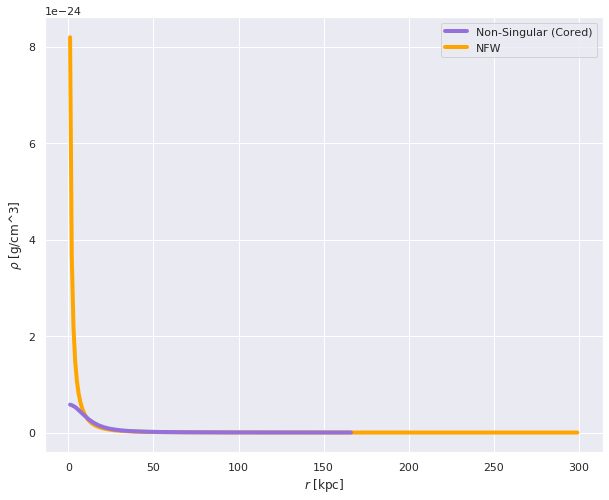

In [22]:
r = np.arange(1, 300) * u.kpc
r1 = np.arange(1, 167) * u.kpc

g_r0 = 15 * u.kpc
g_rho0 = rho_0()

def func(r,r0,rho0):
    return rho0 * arr[int((r/r0) / h)]

rho_cored = [func(r_,g_r0,g_rho0).value for r_ in r1]


plt.figure(figsize = (10, 8))

plt.plot(r1, rho_cored, label = "Non-Singular (Cored)", lw = 4, c = "mediumpurple",zorder=10)
plt.plot(r,rho(r),label="NFW", lw = 4, c = "orange")
#plt.ylim(1e-400,2e-24)
plt.ylabel(r"$\rho$ [g/cm^3]")
plt.xlabel(r"$r$ [kpc]")
plt.legend()
# #plt.title("The isothermal sphere")
# ;